# Video Games Sales Analysis And Visualization

Their fields and data types are:

Rank - Ranking of overall sales, integer

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.), object

Year - Year of the game's release, float

Genre - Genre of the game ,object

Publisher - Publisher of the game, object

NA_Sales - Sales in North America (in millions), float

EU_Sales - Sales in Europe (in millions), float

JP_Sales - Sales in Japan (in millions), float

Other_Sales - Sales in the rest of the world (in millions), float

Global_Sales - Total worldwide sales, float

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data=pd.read_csv('game.csv')

In [3]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.shape

(16598, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
print("Number of games: ", len(data))
publishers = data['Publisher'].unique()
print("Number of publishers: ", len(publishers))
platforms = data['Platform'].unique()
print("Number of platforms: ", len(platforms))
genres =data['Genre'].unique()
print("Number of genres: ", len(genres))

Number of games:  16598
Number of publishers:  579
Number of platforms:  31
Number of genres:  12


In [7]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
data=data.dropna()

## 1. Which Games were made the most ?

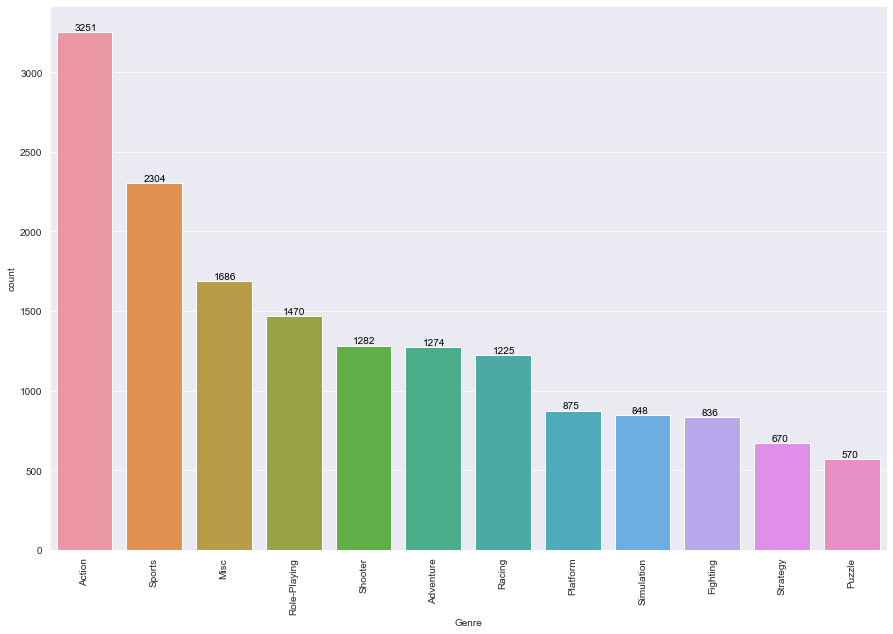

In [9]:
plt.figure(figsize=(15, 10))
ax=sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()

### So We find out that Action Games were made the most 

## 2. From which year most number of games were made ?

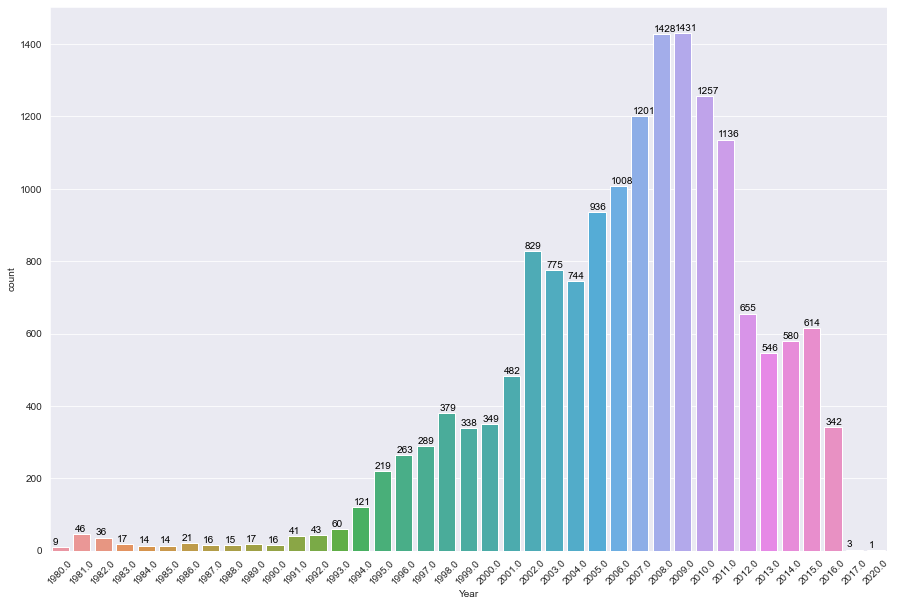

In [10]:
plt.figure(figsize=(15,10))
ax=sns.countplot(data.Year)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.05, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()

### From Year 2000 most number of games were made maybe due to advancement in Technology

## 3. Which year had the highest sales worldwide?

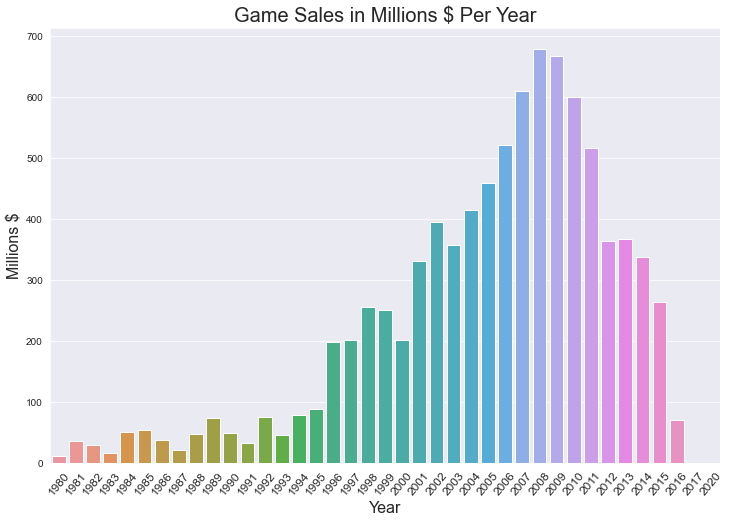

In [11]:
y = data.groupby(['Year'])['Global_Sales'].sum()
x = y.index.astype(int)
plt.figure(figsize=(12,8))
ax=sns.barplot(y = y, x = x)
plt.xlabel(xlabel='Year', fontsize=16)
plt.xticks(fontsize=12, rotation=50)
plt.ylabel(ylabel='Millions $', fontsize=16)
plt.title(label='Game Sales in Millions $ Per Year', fontsize=20)
plt.show()

### 2006

## 4. find out for which Platform games were developed the most?

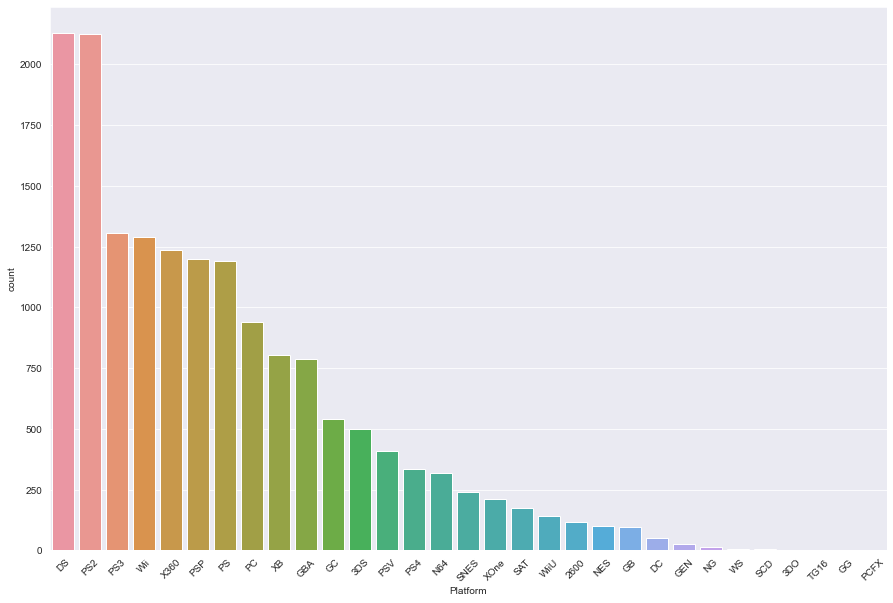

In [12]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot( x="Platform", data=data, order = data['Platform'].value_counts().index)
plt.show()

### The winner is PS2 &DS

## 5. Find out top 5 years games release by genre.

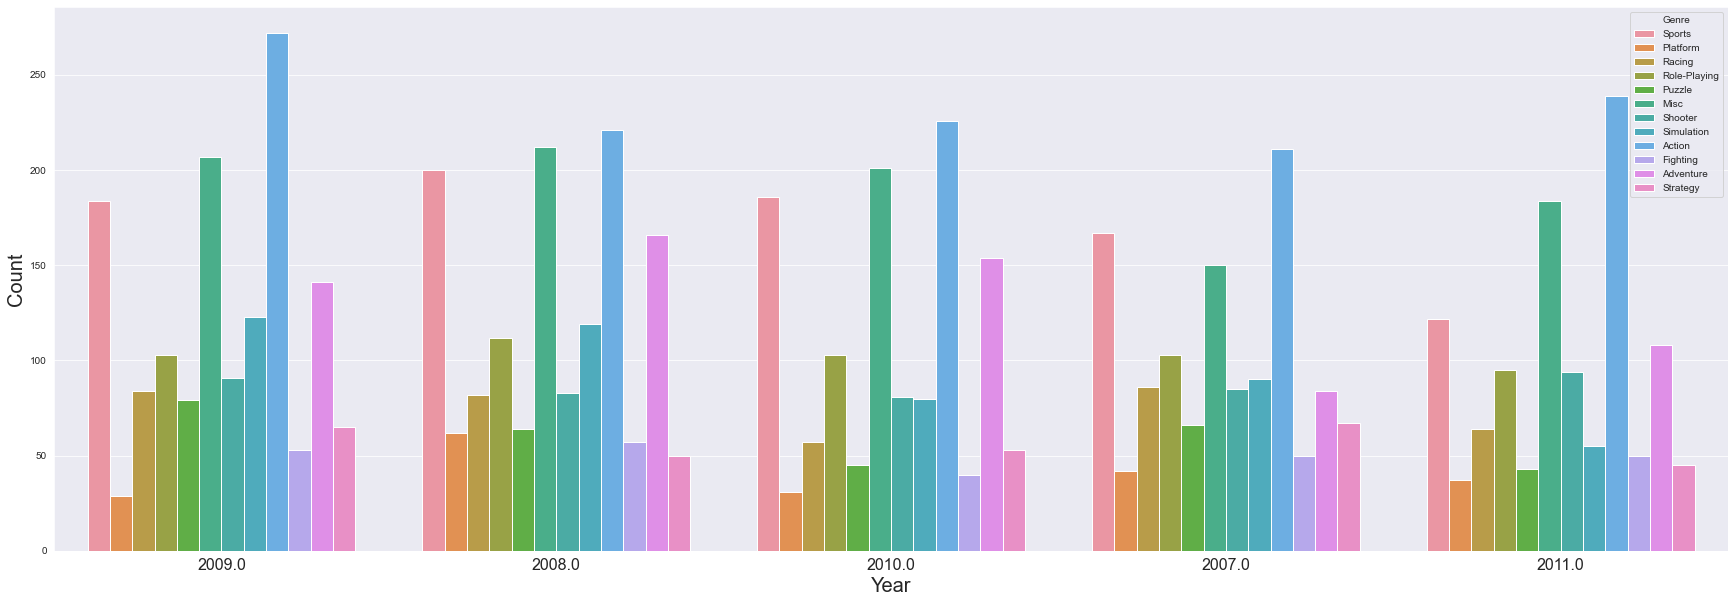

In [24]:
plt.figure(figsize=(30, 10))
sns.countplot(x="Year", data=data, hue='Genre', order=data.Year.value_counts().iloc[:5].index)
plt.xticks(size=16)
plt.xlabel(xlabel='Year', fontsize=20)
plt.ylabel(ylabel='Count', fontsize=20)
plt.show()

## 6. Which genre game have the highest sale price globally?

In [14]:
data_genre = data.groupby(by=['Genre'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)

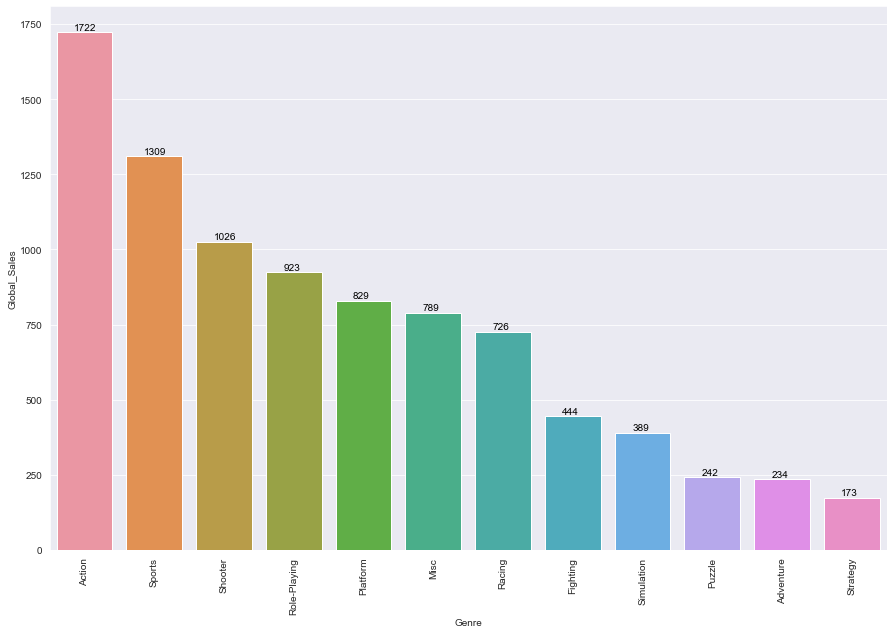

In [15]:
plt.figure(figsize=(15, 10))
ax=sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')
plt.show()

## Action game

## 7. Annual and Global Sales In The World

In [16]:
dataYear=data["Year"].dropna().unique()
dataYear.sort()

In [17]:
na=[]
eu=[]
jp=[]
other=[]
glbl=[]

for i in dataYear:
    x=data[data["Year"]==i]
    
    na.append(sum(x["NA_Sales"]))
    eu.append(sum(x["EU_Sales"]))
    jp.append(sum(x["JP_Sales"]))
    other.append(sum(x["Other_Sales"]))
    glbl.append(sum(x["Global_Sales"]))
 
yearSales=pd.DataFrame({"Year":dataYear, "NA":na, "EU":eu, "JP":jp, "Other":other, "Global":glbl})
yearSales["Year"].astype("int64")

yearSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    39 non-null     float64
 1   NA      39 non-null     float64
 2   EU      39 non-null     float64
 3   JP      39 non-null     float64
 4   Other   39 non-null     float64
 5   Global  39 non-null     float64
dtypes: float64(6)
memory usage: 2.0 KB


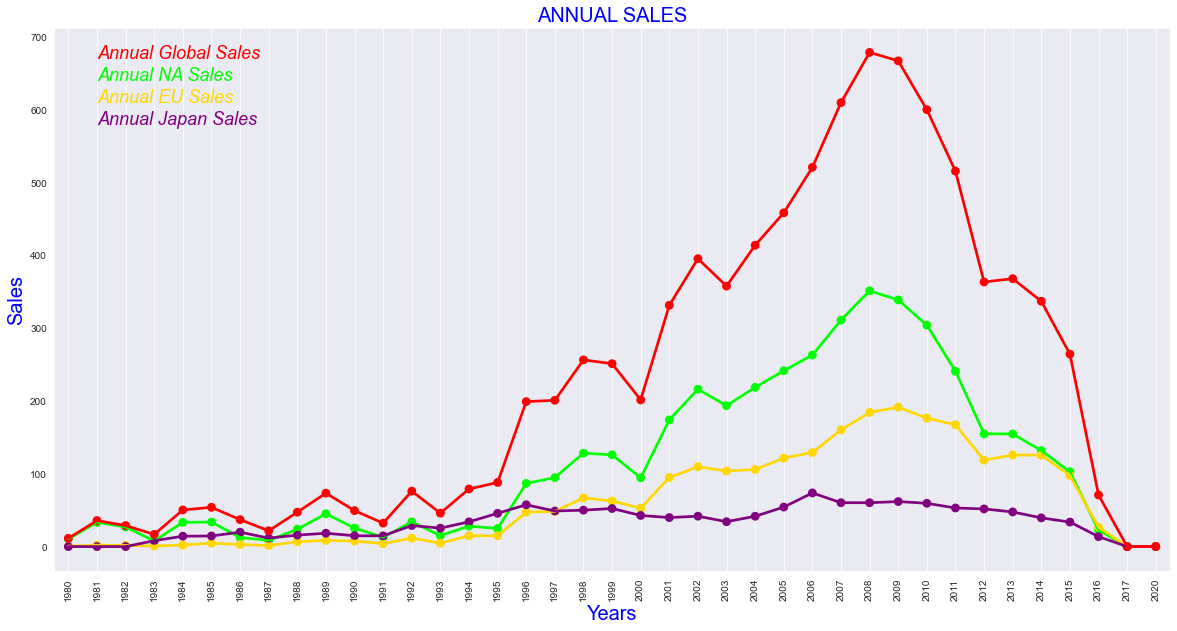

In [18]:
yearSales["Year"]=yearSales.Year.astype("int64")

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x="Year",y="NA" ,data=yearSales,color='lime',alpha=0.8)
sns.pointplot(x="Year",y="EU",data=yearSales,color='gold',alpha=0.8)
sns.pointplot(x="Year",y="JP",data=yearSales,color='purple',alpha=0.8)
sns.pointplot(x="Year",y="Global",data=yearSales,color='red',alpha=0.8)
plt.text(1,670,'Annual Global Sales',color='red',fontsize = 18,style = 'italic')
plt.text(1,640,'Annual NA Sales',color='lime',fontsize = 18,style = 'italic')
plt.text(1,610,'Annual EU Sales',color='gold',fontsize = 18,style = 'italic')
plt.text(1,580,'Annual Japan Sales',color='purple',fontsize = 18,style = 'italic')
plt.xticks(rotation=90)
plt.xlabel('Years',fontsize = 20,color='blue')
plt.ylabel('Sales',fontsize = 20,color='blue')
plt.title('ANNUAL SALES',fontsize = 20,color='blue')
plt.grid()

## 8. Which platfrom have the highest sale price globally?

In [19]:
data_platform = data.groupby(by=['Platform'])['Global_Sales'].sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)

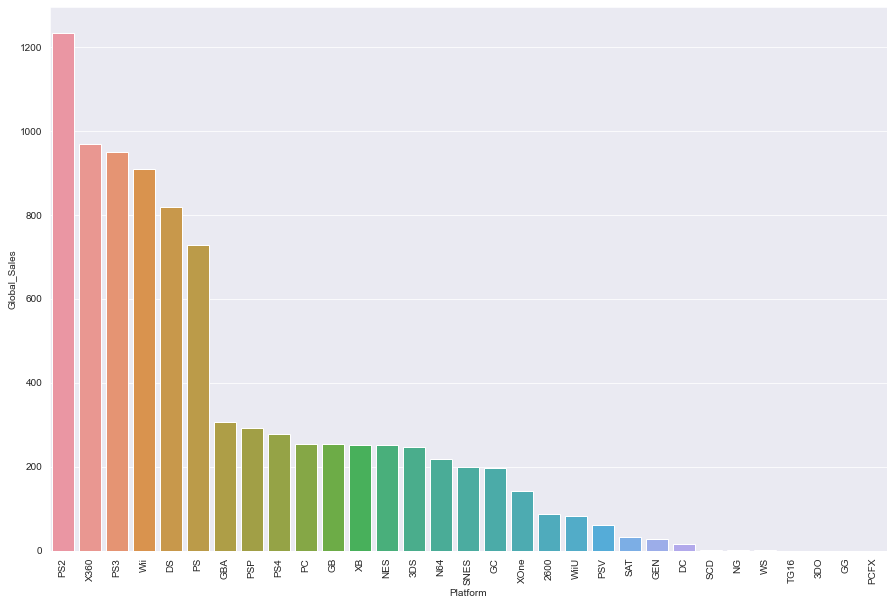

In [20]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=90)
plt.show()

## PS2 :)

## 9. Which are Top 20 Publisher?

In [21]:
top_publisher = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()

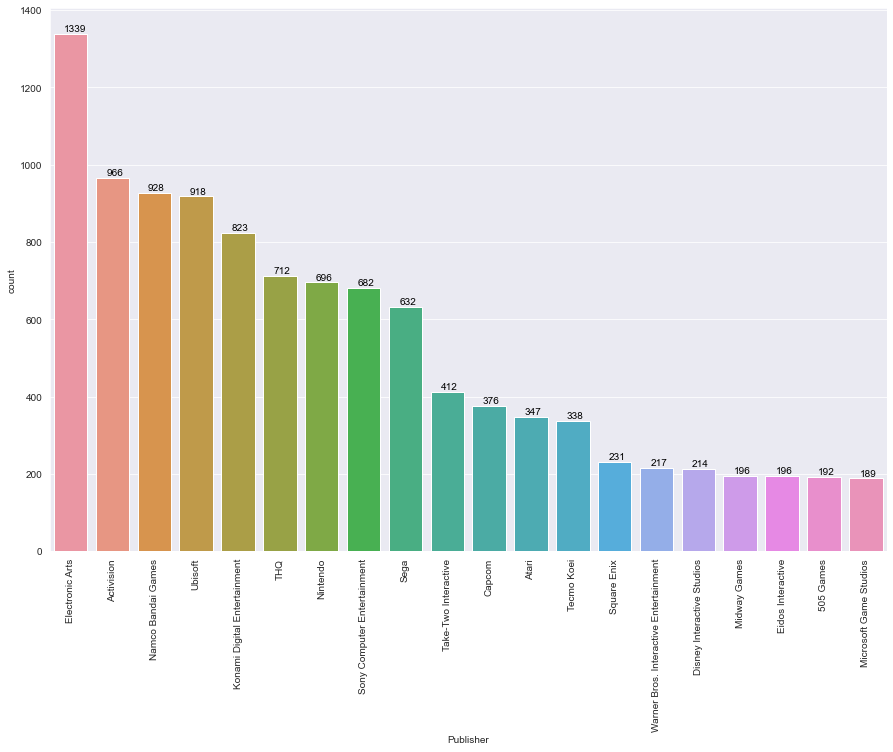

In [22]:
plt.figure(figsize=(15, 10))
ax=sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')